Thomas Chant

DSCI403

Semester Project Update #1

# Data Acquisition

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The dataset I will be working with is the “BigMart Sale Data” set suggested in the course description, acquired from Kaggle.com.  The data includes the features “Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type, Item_Outlet_Sales.”  “Item Outlet Sales” is the target variable, and each of the others could be considered for the predictive model.  Certain variables such as “Item_Identifier” may be disregarded during the final model building, since it would be impractical to create thousands of dummy variables to represent thousands of different ID numbers.  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The data is from 10 different stores and has 1559 different products.  The data exists in the form of a .CSV file, and was uploaded to Kaggle, and obtained from public domain.  Since the file is public domain, there should not be any issues or limitations in sharing of the data or my work.  As far as use, while the set is free to use and explore for anyone, the data set was uploaded 5 years ago, so its usefulness for modern predictions is likely outdated, and the model should be viewed more as a practice exercise, an example predictive model and evidence of ability, rather than a model that should be applied in its current state.
 


# Preprocessing

In [1]:
#Import some things

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np
import pandas as pd # we love pandas
import seaborn as sns #graphs
import nbconvert #for making a pdf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, mutual_info_regression, RFE
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
import matplotlib.patches as mpatches
from sklearn import tree
from matplotlib.pyplot import figure


In [2]:
nRowsRead = 'None'
train = pd.read_csv(r'C:\Users\thoma\Desktop\Colorado School of Mines\Fall 2022\DSCI403 - Introduction to Data Science\Final Project\Train.csv')
train.dataframeName = 'Train.csv'
test = pd.read_csv(r'C:\Users\thoma\Desktop\Colorado School of Mines\Fall 2022\DSCI403 - Introduction to Data Science\Final Project\Test.csv')
test.dataframeName = 'Test.csv'
nRow, nCol = train.shape
train.head(5) #take a quick look at our data imported to make sure everything is copacetic

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
train
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [4]:
train.isnull().sum()/train.shape[0] *100 #Checking out or missing values as percentages

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [5]:
test.isnull().sum()/test.shape[0] *100 #Checking out or missing values as percentages

Item_Identifier               0.000000
Item_Weight                  17.180074
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.269671
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64

The percentage of missing values is nearly identical between the training and test sets.
There is no need to toss out any of these variables, as those that are missing values are missing a fairly small percentage.
Next, we will visually examine these variables with missing values to see if it would be appropriate to impute the missing values.

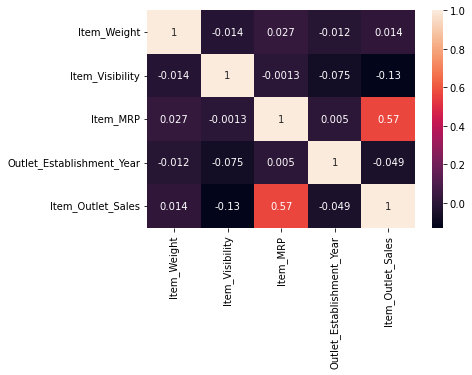

In [6]:
corr_matrix = train.corr()
#print(corr_matrix)
sns.heatmap(corr_matrix, annot=True)
plt.show()

C:\Users\thoma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Weight'>

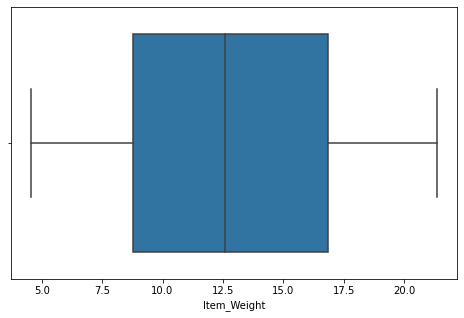

In [7]:
plt.figure(figsize=(8,5))
sns.boxplot('Item_Weight',data=train)


Since the boxplot here does not show any significant outliers, and there does not appear to be any major correlation between Item_Weights and any of the other quantitative variables, we will impute the missing Item_Weight values as the mean.

Also worth noting that Item_MRP has the highest correlation with our target variable.

In [8]:
train['Item_Weight']= train['Item_Weight'].fillna(train['Item_Weight'].mean())
test['Item_Weight']= test['Item_Weight'].fillna(test['Item_Weight'].mean())

In [9]:
print(train['Outlet_Size'].value_counts())

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64


We will imput the missing "Outlet_Size" values as Medium, since it is the mode.

In [10]:
train['Outlet_Size']= train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])
test['Outlet_Size']= test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0])

C:\Users\thoma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Frequency of Item Types Sold')]

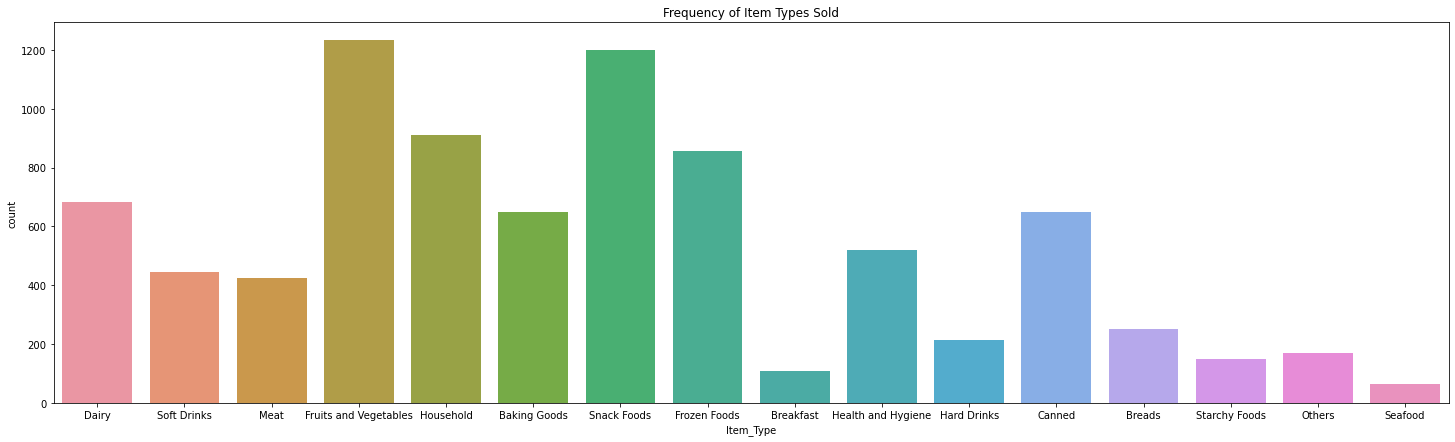

In [11]:
plt.figure(figsize=(25,7))
sns.countplot('Item_Type',data=train).set(title='Frequency of Item Types Sold')

Fruits and Vegetables seem to be the most popular, Seafood is the least popular.

C:\Users\thoma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Fat Content Comparison')]

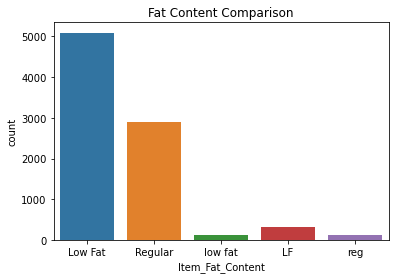

In [12]:
sns.countplot('Item_Fat_Content',data=train).set(title='Fat Content Comparison')

From this, we can see that there are two categories each for "Low Fat" and "Regular," we should fix this.

C:\Users\thoma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Fat Content Comparison')]

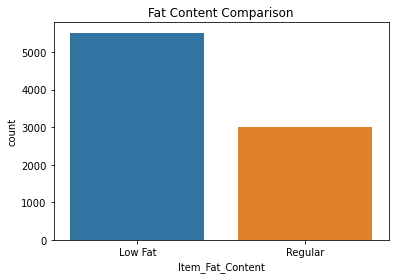

In [13]:
train=train.replace(to_replace='low fat', value='Low Fat')
train=train.replace(to_replace='reg', value='Regular')
test=test.replace(to_replace='low fat', value='Low Fat')
test=test.replace(to_replace='reg', value='Regular')
train=train.replace(to_replace='LF', value='Low Fat')
test=test.replace(to_replace='LF', value='Low Fat')
sns.countplot('Item_Fat_Content',data=train).set(title='Fat Content Comparison') #Double check that worked

I believe that the "Outlet_Establishement_Year" variable will serve better as a "Years since Established" variable. Since this data set was uploaded in 2017, we will use this as our "Present"

In [14]:
max(train['Outlet_Establishment_Year'])

2009

In [15]:
train['Years_Established'] = train['Outlet_Establishment_Year'].apply(lambda x: 2017 - x) 
test['Years_Established'] = test['Outlet_Establishment_Year'].apply(lambda x: 2017 - x)

In [16]:
test=test.drop(labels='Outlet_Establishment_Year',axis=1)
train=train.drop(labels='Outlet_Establishment_Year',axis=1)

C:\Users\thoma\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


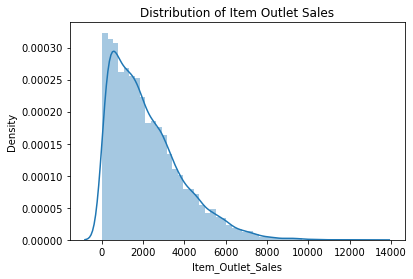

In [17]:
sns.distplot(train['Item_Outlet_Sales']).set(title='Distribution of Item Outlet Sales')
plt.show()

This distribution is certainly skewed right.  It would appear the majority of the values for our target variable tend to be in the 0 to 4000 range.

[Text(0.5, 1.0, 'Total Sale Values by Category')]

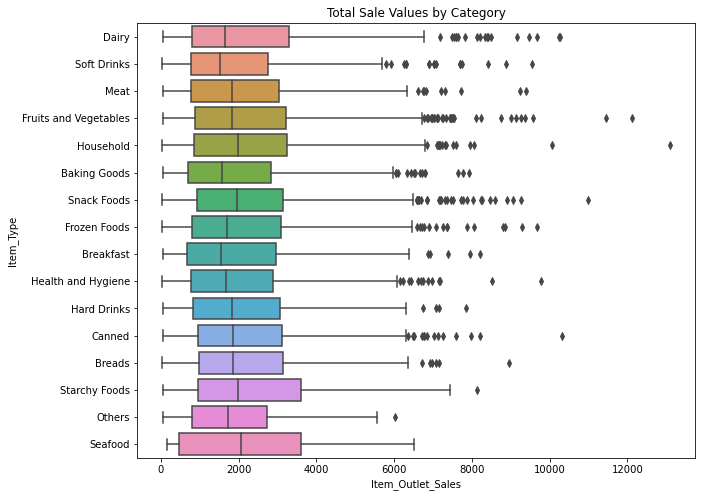

In [18]:
plt.figure(figsize=(10,8))
sns.boxplot(y='Item_Type',x='Item_Outlet_Sales',data=train).set(title='Total Sale Values by Category')

Worth noting that certain categories (Seafood, in particular) have a significantly higher median total sale value than one may expect by their low frequency of sales when compared to other categories.  This is easily attributable to the higher cost for an item like salmon compared to something like a box of Teddy Grahams.
It is fascinating that all of the total sale value distributions are so close across categories.  There does not appear to be any single category that significantly outerperforms the others.
The number of outliers in certain categories like Fruits and Vegetables is also notable.

When considering ethics, I was curious as to whether the visibility of certain product categories was being promoted.

[Text(0.5, 1.0, 'Item Visibility across Categories')]

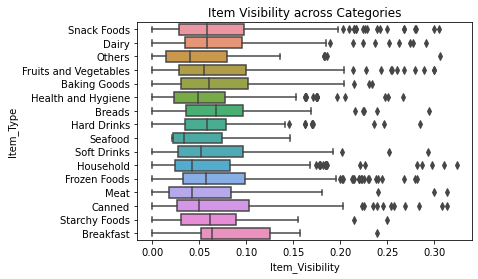

In [19]:
sns.boxplot(data=test, x="Item_Visibility", y="Item_Type").set(title='Item Visibility across Categories')

Seafood semms generally less visible than other categories, but also the Seafood category features no values of 0, meaning that all seafood items sold are displayed.
Breads appear to be generally the most visible, which makes sense when one thinks about a market.  Breads tend to be well displayed in general.

Now lets look at some statistics.

In [20]:
categorical = train.select_dtypes(include =[object])
print("Categorical Features in Train Set:",categorical.shape[1])

numerical= train.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

Categorical Features in Train Set: 7
Numerical Features in Train Set: 5


In [21]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Years_Established
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,2181.288914,19.168133
std,4.226124,0.051598,62.275067,1706.499616,8.371760
min,4.555000,0.000000,31.290000,33.290000,8.000000
25%,9.310000,0.026989,93.826500,834.247400,13.000000
50%,12.857645,0.053931,143.012800,1794.331000,18.000000
75%,16.000000,0.094585,185.643700,3101.296400,30.000000
max,21.350000,0.328391,266.888400,13086.964800,32.000000


I am curious how "Item_Visibility" was determined.  One would think that "0 Visibility" would mean something is not visible at all, but that's clearly not the case here since those items do have sales.

# Ethics

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; In studying the data for a supermarket chain, we are uncovering trends within society, eg; where do people spend their money on groceries?  Certain variables, like the visibility of items, will indicate whether the market is intentionally trying to promote certain categories.  For example, we could uncover that snack foods tend to have much higher visibility when compared to healthier alternatives.  In uncovering these potential trends, BigMart would have information that they can use when making deals with brands.  If we find that, for example, a high visibility score is a critical factor when determining total sales, BigMart could auction off the best spots to brands, and certain products would be purchased more frequently simply because they were more visible.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Another consideration when it comes to ethics here is the question of whether trying to forecast sales, and determine important factors in prediction from past data, is ultimately a productive goal.  While yes, this information will undoubtedly be valuable to BigMart, should we be making these models based off of previous data?  If, for example, supermarkets have classically found that people will purchase more chips when they’ve been placed in an additional, special location outside of the aisle, but have not attempted this practice with more healthy alternatives, and we prove that higher visibility is critically important to the sales of snack foods, the market will continue this practice.  If the market has never tested whether the same behavioral patterns would also apply to healthier alternatives such as food and vegetables, then the model wouldn’t be able to prove whether the same practice works across categories.  These are just the first examples that come to mind when thinking about how applying data science to a supermarket could be ethically cumbersome, and the implications of all results should be considered, as well as what dangers may arise when taking action.

# Prepping the data

Fixing Some Data Types

In [22]:
categoricaltransformer = LabelEncoder()
categoricalvariables = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type']

for i in categoricalvariables:
    train[i] = categoricaltransformer.fit_transform(train[i])
    
for i in categoricalvariables:
    test[i] = categoricaltransformer.fit_transform(test[i])

Dropping the ones I can't figure out how to make play nice


In [23]:
train = train.drop(['Item_Identifier','Outlet_Identifier'],axis=1)
test= test.drop(['Item_Identifier','Outlet_Identifier'],axis=1)

In [24]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,9.30,0,0.016047,4,249.8092,1,0,1,3735.1380,18
1,5.92,1,0.019278,14,48.2692,1,2,2,443.4228,8
2,17.50,0,0.016760,10,141.6180,1,0,1,2097.2700,18
3,19.20,1,0.000000,6,182.0950,1,2,0,732.3800,19
4,8.93,0,0.000000,9,53.8614,0,2,1,994.7052,30


In [25]:
y = train['Item_Outlet_Sales']
X = train.drop(labels = 'Item_Outlet_Sales', axis = 1)

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [27]:
X_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Years_Established
6404,12.857645,0,0.008722,6,123.5414,1,2,3,32
5820,18.700000,0,0.014623,14,52.0324,1,1,1,15
48,15.850000,1,0.121633,0,60.6220,2,0,1,20
4583,12.857645,0,0.145670,5,247.2776,2,0,0,32
3791,21.000000,0,0.049296,13,194.4478,2,1,1,13


Text(0, 0.5, 'Item Outlet Sales')

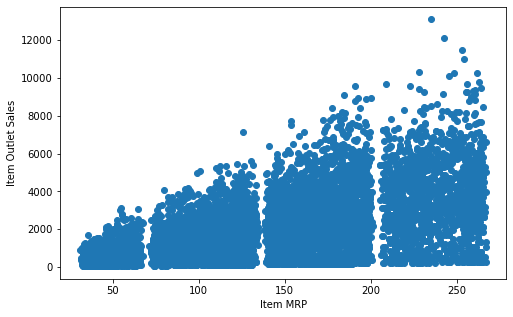

In [28]:
plt.figure(figsize=(8,5))
plt.scatter(y='Item_Outlet_Sales',x='Item_MRP',data=train)
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')

In [29]:
lassoEst=LassoCV(n_alphas=10).fit(X_train,y_train)
lassocoeffeaturemags = []
lassofeaturenames = []
for feature, coef in zip(X_train.columns, lassoEst.coef_):
    print(f"The magniture of the feature coefficient for {feature} is {abs(coef)}.")
    lassocoeffeaturemags.append(abs(coef))
    lassofeaturenames.append(feature)
print(f"The mean squared error when training using lasso is {mean_squared_error(y_train, lassoEst.predict(X_train))}.")
print(f"When testing on the test data, the mean squared error is {mean_squared_error(y_test, lassoEst.predict(X_test))}")

print('R squared training set', round(lassoEst.score(X_train, y_train)*100, 2))
print('R squared test set', round(lassoEst.score(X_test, y_test)*100, 2))
ypred_lasso = lassoEst.predict(X_test)
rsquared_lasso = r2_score(y_test, ypred_lasso)
print('R Squared value using LassoCV = ', rsquared_lasso)

The magniture of the feature coefficient for Item_Weight is 0.0.
The magniture of the feature coefficient for Item_Fat_Content is 0.0.
The magniture of the feature coefficient for Item_Visibility is 0.0.
The magniture of the feature coefficient for Item_Type is 0.0.
The magniture of the feature coefficient for Item_MRP is 15.543449630225787.
The magniture of the feature coefficient for Outlet_Size is 0.0.
The magniture of the feature coefficient for Outlet_Location_Type is 89.19585763398521.
The magniture of the feature coefficient for Outlet_Type is 804.5091002179853.
The magniture of the feature coefficient for Years_Established is 0.0.
The mean squared error when training using lasso is 1487250.1559545898.
When testing on the test data, the mean squared error is 1490114.7493765443
R squared training set 48.86
R squared test set 49.09
R Squared value using LassoCV =  0.49088271118427695


In [30]:
RFmodel= RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4,random_state=22)
RFmodel.fit(X_train,y_train)
y_predRF = RFmodel.predict(X_test)
print(f"The mean squared error when training using Random Forest is {mean_squared_error(y_train, RFmodel.predict(X_train))}.")
print(f"When testing on the test data, the mean squared error is {mean_squared_error(y_test, RFmodel.predict(X_test))}")

The mean squared error when training using Random Forest is 1149725.4242229492.
When testing on the test data, the mean squared error is 1202952.3989030758


In [31]:
rsquared_RF = r2_score(y_test, y_predRF)
print('R Squared value using Random Forest = ', rsquared_RF)

y_predtrRF = RFmodel.predict(X_train)
rsquared_trRF = r2_score(y_train, y_predtrRF)
print('R Squared training value using Random Forest = ', rsquared_RF)

R Squared value using Random Forest =  0.5889955024201006
R Squared training value using Random Forest =  0.5889955024201006


In [32]:
kbest = 1
knnrsquaredbest = 0
for k in range(1,20):
    KNNmodel = KNeighborsRegressor(n_neighbors = k)
    KNNmodel.fit(X_train, y_train)
    y_predKNN = KNNmodel.predict(X_test)
    rsquared_KNN = r2_score(y_test, y_predKNN)
    print(f'R Squared value using K Nearest Neighbors with K = {k} = ', rsquared_KNN)
    if rsquared_KNN > knnrsquaredbest:
        knnrsquaredbest = rsquared_KNN
        kbest = k
        y_pred_KNNbest = y_predKNN
        y_pred_KNNbesttrain = KNNmodel.predict(X_train)
print(f'Best R Squared value using K Nearest Neighbors was with K = {kbest}, where r^2= ', knnrsquaredbest)

R Squared value using K Nearest Neighbors with K = 1 =  0.11082520644338634
R Squared value using K Nearest Neighbors with K = 2 =  0.3078288033694583
R Squared value using K Nearest Neighbors with K = 3 =  0.3470013515236303
R Squared value using K Nearest Neighbors with K = 4 =  0.3911727365812846
R Squared value using K Nearest Neighbors with K = 5 =  0.4175073492736837
R Squared value using K Nearest Neighbors with K = 6 =  0.42654201591196284
R Squared value using K Nearest Neighbors with K = 7 =  0.4258023568788598
R Squared value using K Nearest Neighbors with K = 8 =  0.4240536288112622
R Squared value using K Nearest Neighbors with K = 9 =  0.4247921734713056
R Squared value using K Nearest Neighbors with K = 10 =  0.41832670640493486
R Squared value using K Nearest Neighbors with K = 11 =  0.41481180394229966
R Squared value using K Nearest Neighbors with K = 12 =  0.41046712237100724
R Squared value using K Nearest Neighbors with K = 13 =  0.40737293341991887
R Squared value

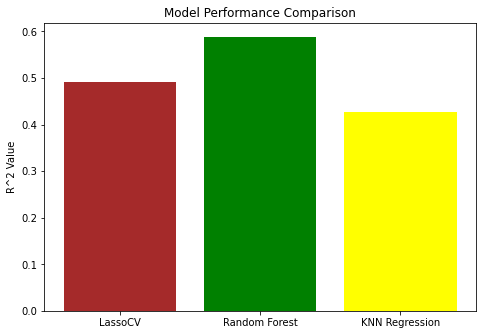

In [33]:
rsquaredlist = [rsquared_lasso, rsquared_RF, knnrsquaredbest]
models = ['LassoCV', 'Random Forest', 'KNN Regression']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(models, rsquaredlist, color = ['brown', 'green', 'yellow'])
ax.set_title('Model Performance Comparison')
ax.set_ylabel('R^2 Value')
plt.show()

C:\Users\thoma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Item_Fat_Content        0.000000e+00
Outlet_Size             8.798416e-07
Item_Type               1.233968e-04
Item_Weight             4.247495e-04
Outlet_Location_Type    8.564241e-04
Item_Visibility         1.298682e-03
Years_Established       5.080366e-02
Outlet_Type             3.906482e-01
Item_MRP                5.558440e-01
dtype: float64

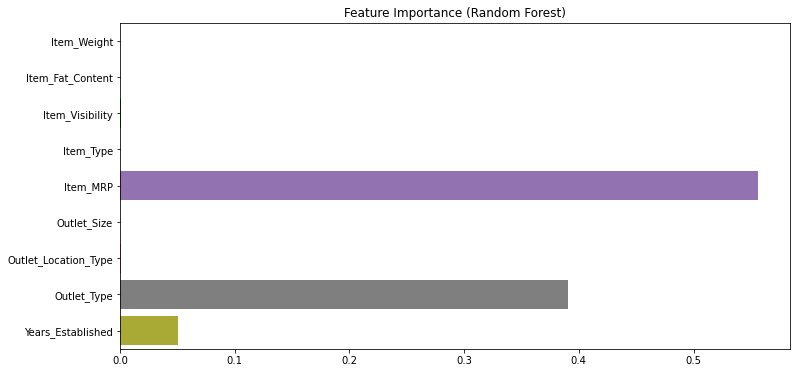

In [34]:
features= ['Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Size','Outlet_Location_Type','Outlet_Type','Years_Established']

featureimportanceRF = pd.Series(RFmodel.feature_importances_, features).sort_values(ascending=True)
plt.figure(figsize=(12,6))
sns.barplot(RFmodel.feature_importances_,features).set(title = 'Feature Importance (Random Forest)')
featureimportanceRF

In [35]:
RFtrainMSE = mean_squared_error(y_train, RFmodel.predict(X_train))
RFtestMSE = mean_squared_error(y_test, RFmodel.predict(X_test))

LassotrainMSE = mean_squared_error(y_train, lassoEst.predict(X_train))
LassotestMSE = mean_squared_error(y_test, lassoEst.predict(X_test))

KNNtrainMSE = mean_squared_error(y_train, y_pred_KNNbesttrain)
KNNtestMSE = mean_squared_error(y_test, y_pred_KNNbest)

MSEtrainlist = [LassotrainMSE, RFtrainMSE, KNNtrainMSE]
MSEtestlist = [LassotestMSE, RFtestMSE, KNNtestMSE]

In [36]:
print(RFtestMSE)
print(LassotestMSE)

1202952.3989030756
1490114.7493765443


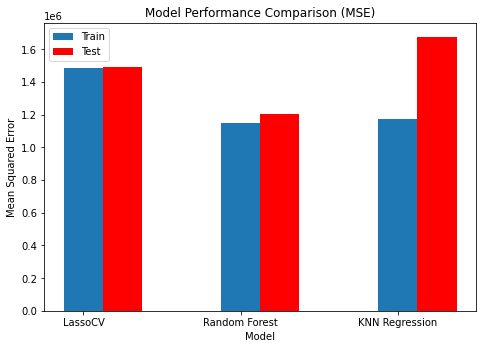

In [37]:
fig = plt.figure()
ind = np.arange(3)  
ax = fig.add_axes([0,0,1,1])
br1 = np.arange(len(MSEtrainlist))
br2 = [x + 0.25 for x in br1]
ax.bar(br1, MSEtrainlist, width = 0.25)
ax.bar(br2, MSEtestlist, color = 'red', width = 0.25)

plt.xlabel('Model')
plt.ylabel('Mean Squared Error')

plt.legend(["Train", "Test"])
plt.title('Model Performance Comparison (MSE)')
plt.xticks(ind, models)
plt.show()


In [38]:
pcamodel = PCA()
pcamodel.fit(X_train, y_train)
X_train_pca = pcamodel.fit_transform(X_train, y_train)
X_test_pca = pcamodel.transform(X_test)


In [39]:
lassoEstpca=LassoCV(n_alphas=10).fit(X_train_pca,y_train)

print('R squared training set', round(lassoEstpca.score(X_train_pca, y_train)*100, 2))
print('R squared test set', round(lassoEstpca.score(X_test_pca, y_test)*100, 2))
ypred_lasso_pca = lassoEst.predict(X_test)
rsquared_lasso_pca = r2_score(y_test, ypred_lasso_pca)
print('R Squared value using LassoCV with PCA applied = ', rsquared_lasso_pca)

R squared training set 49.25
R squared test set 49.45
R Squared value using LassoCV with PCA applied =  0.49088271118427695


In [40]:
kbestpca = 1
knnrsquaredbestpca = 0
for k in range(1,20):
    KNNmodelpca = KNeighborsRegressor(n_neighbors = k)
    KNNmodelpca.fit(X_train_pca, y_train)
    y_predKNN_pca = KNNmodelpca.predict(X_test_pca)
    rsquared_KNN_pca = r2_score(y_test, y_predKNN_pca)
    #print(f'R Squared value using K Nearest Neighbors with K = {k} = ', rsquared_KNN)
    if rsquared_KNN_pca > knnrsquaredbestpca:
        knnrsquaredbestpca = rsquared_KNN_pca
        kbestpca = k
print(f'Best R Squared value using K Nearest Neighbors was with with pca with K = {kbestpca}, where r^2= ', knnrsquaredbestpca)

Best R Squared value using K Nearest Neighbors was with with pca with K = 6, where r^2=  0.42654201591196284


In [41]:
RFmodel= RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4,random_state=22)
RFmodel.fit(X_train,y_train)
y_predRF = RFmodel.predict(X_test)
y_trainpred = RFmodel.predict(X_train)
print(f"The mean squared error when training using Random Forest is {mean_squared_error(y_train, RFmodel.predict(X_train))}.")
print(f"When testing on the test data, the mean squared error is {mean_squared_error(y_test, RFmodel.predict(X_test))}")

The mean squared error when training using Random Forest is 1149725.4242229492.
When testing on the test data, the mean squared error is 1202952.398903076


In [42]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [43]:
print(f'The train MAPE is {mape(y_train, y_trainpred)}')     
print(f'The test MAPE is {mape(y_test, y_predRF)}') 

The train MAPE is 56.69797690067011
The test MAPE is 61.29173092771561


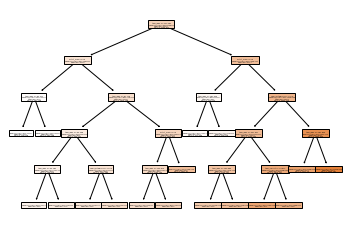

<Figure size 2880x2880 with 0 Axes>

In [44]:
#_ = tree.plot_tree(RFmodel.estimators_[0], feature_names=X_train.columns, filled=True, ax = (10,10))
tree.plot_tree(RFmodel.estimators_[0], feature_names=X_train.columns, filled=True)
#plt.savefig(sys.stdout.buffer)
#sys.stdout.flush()
#figure(figsize=(100, 100))
#plt.show()
#fig = plt.gcf()
fig = plt.figure(figsize=(40, 40))
fig.savefig('test6png.png', dpi=100)
#fig.savefig('test2png.png', dpi=100)

Text(0.5, 1.0, 'Predicted')

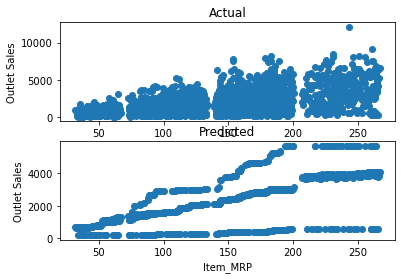

In [45]:
plt.subplot(2,1,1)
plt.scatter(x=X_test['Item_MRP'], y=y_test)
plt.title('Actual')
plt.xlabel('Item_MRP')
plt.ylabel('Outlet Sales')
#plt.figure(figsize=(12,10))
plt.subplot(2,1,2)
plt.scatter(x=X_test['Item_MRP'], y=y_predRF)
plt.xlabel('Item_MRP')
plt.ylabel('Outlet Sales')
plt.title('Predicted')
#plt.figure(figsize=(12,10))
